In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM , Dense
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

c:\Users\Shivam\anaconda3\Lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

In [3]:
df = yf.download("BHEL.NS" , start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-26,63.549999,65.599998,62.200001,64.849998,62.682377,6564549
2019-02-27,65.099998,66.000000,64.599998,64.949997,62.779034,6764048
2019-02-28,65.000000,65.150002,64.099998,64.449997,62.295750,14167452
2019-03-01,64.800003,66.599998,64.650002,66.150002,63.938931,9309674
2019-03-05,67.750000,68.000000,66.400002,67.300003,65.050491,9082342


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-20,226.899994,233.800003,225.949997,230.899994,230.899994,22994469
2024-02-21,232.000000,232.350006,220.050003,221.899994,221.899994,22193528
2024-02-22,224.000000,229.399994,220.949997,228.500000,228.500000,25023398
2024-02-23,229.449997,233.750000,228.500000,229.600006,229.600006,21463226
2024-02-26,229.800003,232.149994,226.250000,228.050003,228.050003,14280717


In [6]:
df.shape

(1235, 6)

In [7]:
df2 = df.reset_index()['Close']

In [8]:
df2.shape

(1235,)

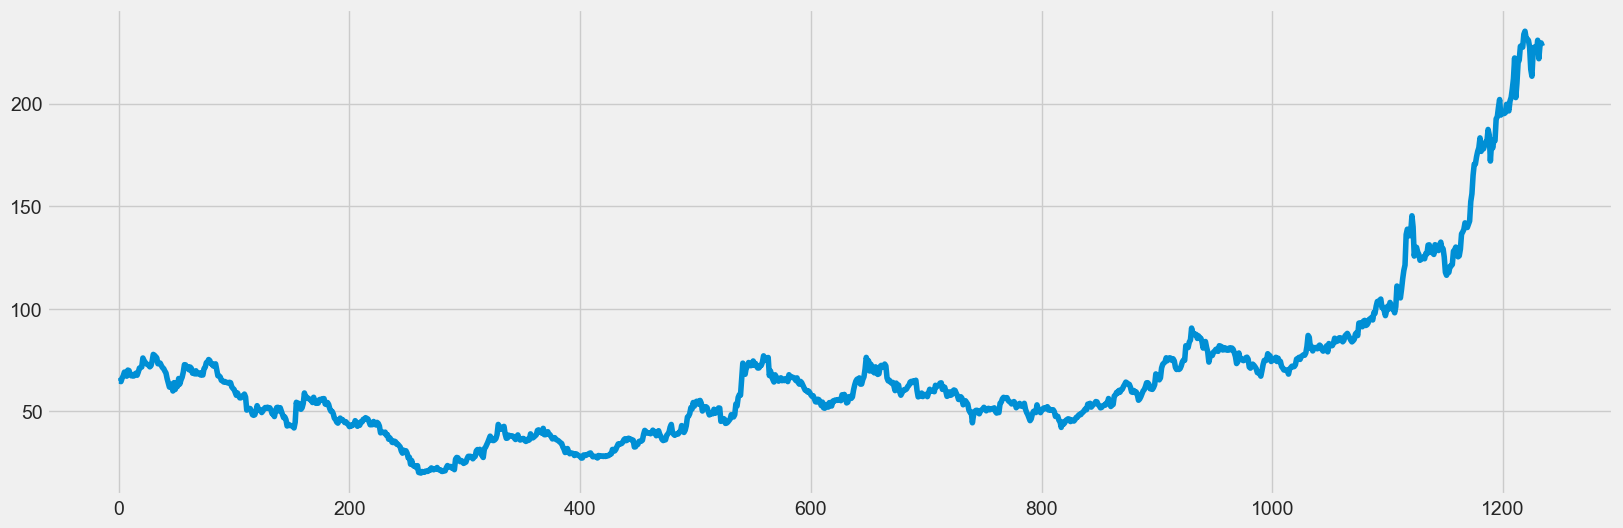

In [9]:
fig_size = (18, 6)  # Adjust the values according to your preference
plt.figure(figsize=fig_size)
plt.plot(df2)

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [11]:
df2.shape

(1235, 1)

In [12]:
training_size = int(len(df2)*0.75)
testing_size = len(df2) - training_size
train_data, test_data = df2[0:training_size,:], df2[training_size: len(df2), :1]

In [13]:
training_size

926

In [14]:
testing_size

309

In [15]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])

    return np.array(dataX), np.array(dataY)

In [16]:
time_step = 100
X_train , y_train = create_dataset(train_data,time_step)
X_test , y_test = create_dataset(test_data,time_step)

In [17]:
X_train.shape

(825, 100)

In [18]:
y_train.shape

(825,)

In [19]:
X_test.shape

(208, 100)

In [20]:
y_test.shape

(208,)

In [21]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [22]:
X_train.shape

(825, 100, 1)

In [23]:
model = Sequential()

In [24]:
model.add(LSTM(100, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))

In [25]:
model.compile(loss="mean_squared_error", optimizer="adam",)

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          40800     
                                                                 
 lstm_1 (LSTM)               (None, 100, 100)          80400     
                                                                 
 lstm_2 (LSTM)               (None, 100, 100)          80400     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 282101 (1.08 MB)
Trainable params: 282101 (1.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
13/13 [==============================] - 19s 779ms/step - loss: 0.0065 - val_loss: 0.0734
Epoch 2/100
13/13 [==============================] - 8s 616ms/step - loss: 0.0024 - val_loss: 0.0618
Epoch 3/100
13/13 [==============================] - 10s 744ms/step - loss: 0.0012 - val_loss: 0.0125
Epoch 4/100
13/13 [==============================] - 15s 1s/step - loss: 7.4116e-04 - val_loss: 0.0123
Epoch 5/100
13/13 [==============================] - 16s 1s/step - loss: 6.4822e-04 - val_loss: 0.0095
Epoch 6/100
13/13 [==============================] - 15s 1s/step - loss: 5.8436e-04 - val_loss: 0.0098
Epoch 7/100
13/13 [==============================] - 16s 1s/step - loss: 5.3272e-04 - val_loss: 0.0107
Epoch 8/100
13/13 [==============================] - 16s 1s/step - loss: 4.8449e-04 - val_loss: 0.0087
Epoch 9/100
13/13 [==============================] - 16s 1s/step - loss: 4.4751e-04 - val_loss: 0.0069
Epoch 10/100
13/13 [==============================] - 16s 1s/step - loss: 4.2

KeyboardInterrupt: 

In [29]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 1s 57ms/step


In [30]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train,train_predict))

0.009311571222322117

In [31]:
math.sqrt(mean_squared_error(y_test, test_predict))

0.0498528744228842

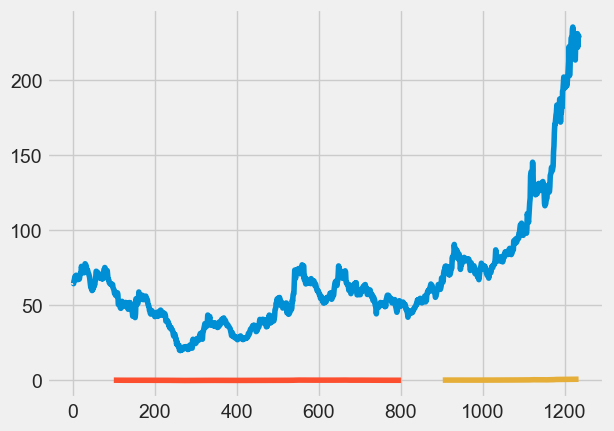

In [51]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

433

In [34]:
x_input=test_data[333:].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [36]:
temp_input

[0.515896951686873,
 0.5165931405688657,
 0.4998839699951444,
 0.4991877457017131,
 0.506149882401711,
 0.4947783487842735,
 0.5168252271371557,
 0.5152007628048801,
 0.5142724165317203,
 0.5035971426191527,
 0.5165931405688657,
 0.5226270372300195,
 0.5075423309885737,
 0.5075423309885737,
 0.4889765386914098,
 0.45439776470251714,
 0.44766767915937067,
 0.45486190242765856,
 0.4539336269773758,
 0.4680900223571002,
 0.4687862466505316,
 0.47203528154939844,
 0.50220469403229,
 0.5047575046377254,
 0.511487590180872,
 0.506381968970001,
 0.48944071182798965,
 0.4917614358651352,
 0.506846142106581,
 0.5414249160954735,
 0.5456021910331845,
 0.5514040011260483,
 0.5662566916220811,
 0.562079345861493,
 0.5558134334549264,
 0.5630076213117758,
 0.5704339665597923,
 0.6145277232655568,
 0.632165240112438,
 0.673938272781057,
 0.6990020640530776,
 0.6992341506213676,
 0.7157113054496761,
 0.7280111145173963,
 0.7361336486474056,
 0.7586447001368678,
 0.7280111145173963,
 0.741703372171979

In [37]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.84075564]
101
1 day input [0.51659314 0.49988397 0.49918775 0.50614988 0.49477835 0.51682523
 0.51520076 0.51427242 0.50359714 0.51659314 0.52262704 0.50754233
 0.50754233 0.48897654 0.45439776 0.44766768 0.4548619  0.45393363
 0.46809002 0.46878625 0.47203528 0.50220469 0.5047575  0.51148759
 0.50638197 0.48944071 0.49176144 0.50684614 0.54142492 0.54560219
 0.551404   0.56625669 0.56207935 0.55581343 0.56300762 0.57043397
 0.61452772 0.63216524 0.67393827 0.69900206 0.69923415 0.71571131
 0.72801111 0.73613365 0.7586447  0.72801111 0.74170337 0.73358084
 0.74170337 0.74982591 0.75052217 0.77767459 0.76537479 0.70619632
 0.74541654 0.73543746 0.75353908 0.75237872 0.80181018 0.80621954
 0.82757016 0.84543976 0.81016473 0.81318172 0.8166628  0.81364582
 0.81573453 0.83453233 0.82571361 0.81967971 0.84195868 0.85008121
 0.86911118 0.89255043 0.93942909 0.84984913 0.88210718 0.92852166
 0.93501973 0.96588533 0.96727778 0.96379669 0.99303783 1.
 0.98375493 0.98259457 0.97911348 0.96402

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [39]:
len(df2)

1235

In [40]:
df3 = df2.tolist()

In [41]:
df3.extend(lst_output)

In [42]:
len(df3)

1265

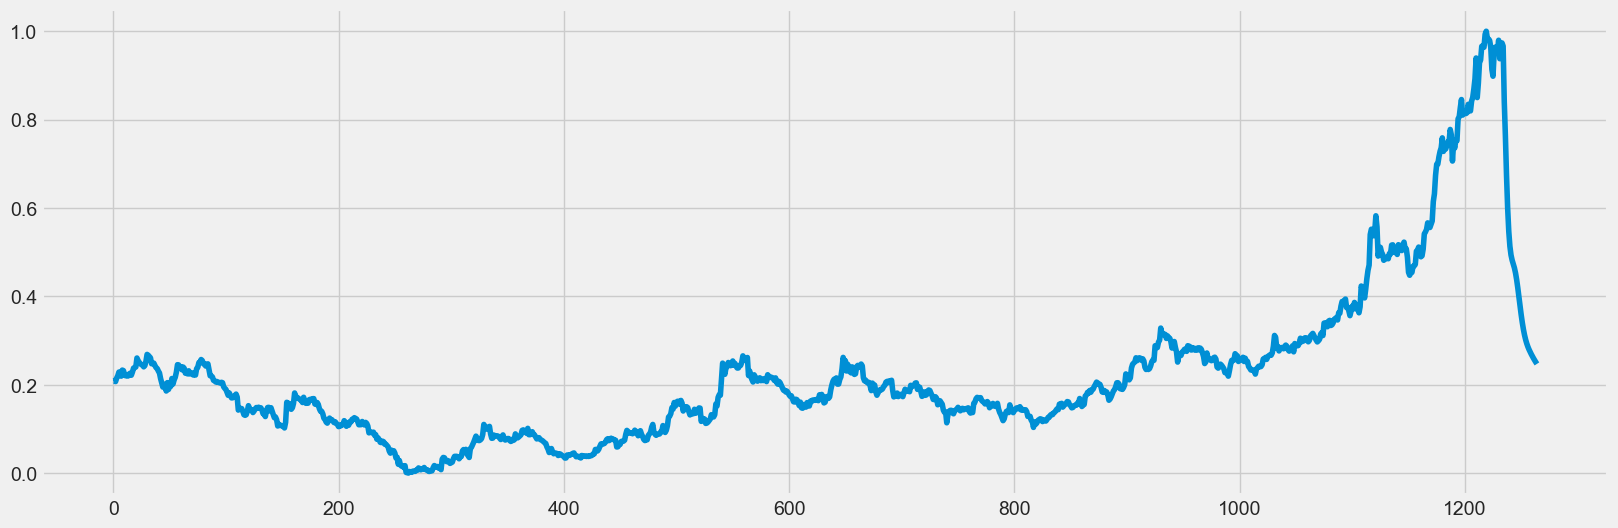

In [43]:
fig_size = (18, 6)  # Adjust the values according to your preference
plt.figure(figsize=fig_size)
plt.plot(df3)

In [44]:
df3=scaler.inverse_transform(df3).tolist()

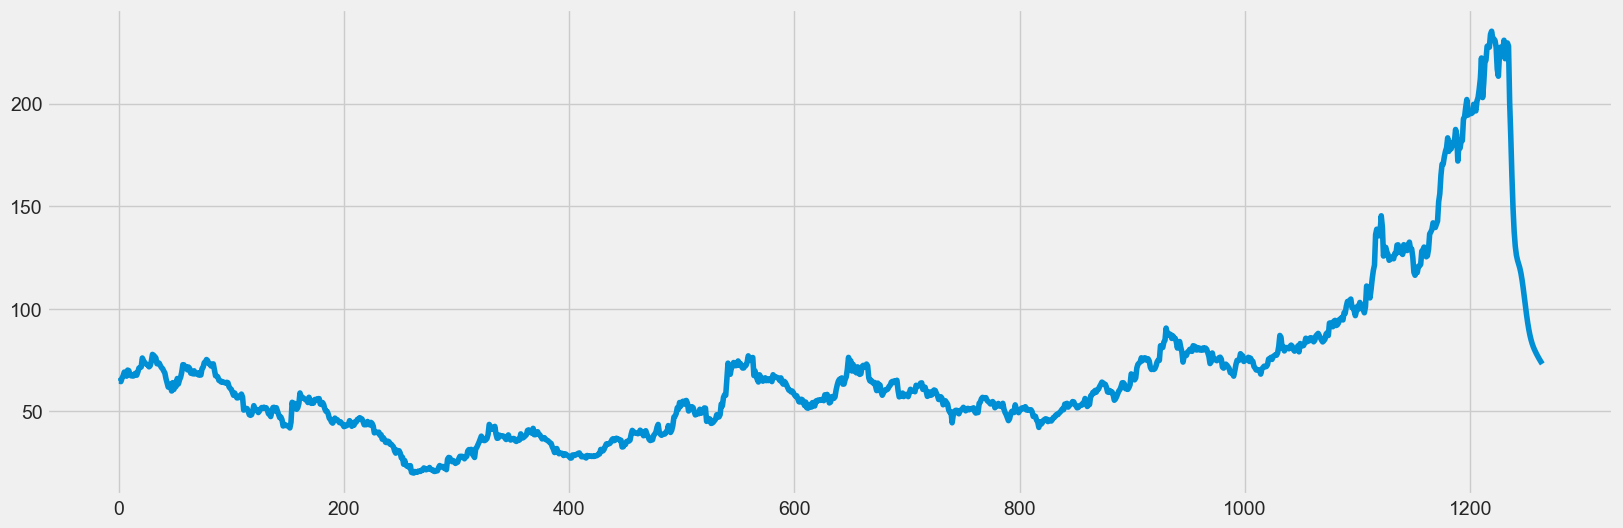

In [45]:
fig_size = (18, 6)  
plt.figure(figsize=fig_size)
plt.plot(df3)

In [46]:
len(df2)

1235

In [47]:
len(df3)

1265

In [48]:
model.save("bhel.h5", model)

c:\Users\Shivam\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
from tensorflow.keras.models import load_model

In [50]:
model_check = load_model("bhel.h5")